In [1]:
import warnings
warnings.filterwarnings("ignore", message = r"Passing", category = FutureWarning)
import os
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import seaborn

Using TensorFlow backend.


In [2]:
np.set_printoptions(threshold = np.inf)
np.set_printoptions(suppress = True)

In [3]:
dim = 162

In [4]:
train_path = r"C:\Users\Ravindra Singh\Desktop\FNF\train"
valid_path = r"C:\Users\Ravindra Singh\Desktop\FNF\val"
test_path = r"C:\Users\Ravindra Singh\Desktop\FNF\test"

In [5]:
def data_label(path):
    data = []
    label = []
    for i in os.listdir(path):
        for j in os.listdir(path + '/' + i):
            img_path = path + '/' + i + '/' + j
            img = PIL.Image.open(img_path).convert('L')
            img = img.resize((dim, dim))
            img = np.array(img)
            img = np.reshape(img, (dim, dim, 1))
            data.append(img)
            if i == 'fire':
                label.append(0)
            elif i == 'no_fire':
                label.append(1)
            else:
                pass
    data = np.array(data)
    return(data, label)

In [6]:
train_data, train_label = data_label(train_path)
valid_data, valid_label = data_label(valid_path)
test_data, test_label = data_label(test_path)

In [7]:
print(train_data.shape)
print(len(train_label))
print(valid_data.shape)
print(len(valid_label))
print(test_data.shape)
print(len(test_label))

(6840, 162, 162, 1)
6840
(1040, 162, 162, 1)
1040
(400, 162, 162, 1)
400


In [8]:
# np.save(r"E:\DL_work\Projects\Fire_&_Smoke\Fire_No_Fire\npy-files\train_data.npy", train_data)
# np.save(r"E:\DL_work\Projects\Fire_&_Smoke\Fire_No_Fire\npy-files\train_label.npy", train_label)
# np.save(r"E:\DL_work\Projects\Fire_&_Smoke\Fire_No_Fire\npy-files\valid_data.npy", valid_data)
# np.save(r"E:\DL_work\Projects\Fire_&_Smoke\Fire_No_Fire\npy-files\valid_label.npy", valid_label)
# np.save(r"E:\DL_work\Projects\Fire_&_Smoke\Fire_No_Fire\npy-files\test_data.npy", test_data)
# np.save(r"E:\DL_work\Projects\Fire_&_Smoke\Fire_No_Fire\npy-files\test_label.npy", test_label)

In [9]:
# train_data = np.load(r"E:\DL_work\Projects\Fire_&_Smoke\Fire_No_Fire\npy-files\train_data.npy")
# train_label = np.load(r"E:\DL_work\Projects\Fire_&_Smoke\Fire_No_Fire\npy-files\train_label.npy")
# valid_data = np.load(r"E:\DL_work\Projects\Fire_&_Smoke\Fire_No_Fire\npy-files\valid_data.npy")
# valid_label = np.load(r"E:\DL_work\Projects\Fire_&_Smoke\Fire_No_Fire\npy-files\valid_label.npy")
# test_data = np.load(r"E:\DL_work\Projects\Fire_&_Smoke\Fire_No_Fire\npy-files\test_data.npy")
# test_label = np.load(r"E:\DL_work\Projects\Fire_&_Smoke\Fire_No_Fire\npy-files\test_label.npy")

In [10]:
# print(train_data.shape)
# print(len(train_label))
# print(valid_data.shape)
# print(len(valid_label))
# print(test_data.shape)
# print(len(test_label))

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(20, (3, 3), strides = 2, activation = 'relu', padding = 'same', input_shape = (dim, dim, 1), ))
model.add(keras.layers.MaxPooling2D((2, 2),padding = 'same'))
model.add(keras.layers.Conv2D(40, (3, 3), strides = 2, padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2),padding = 'same'))
model.add(keras.layers.Conv2D(60, (3, 3), strides = 2, padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2),padding = 'same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(30, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 81, 81, 20)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 40)        7240      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 40)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 60)          21660     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 60)          0         
_________________________________________________________________
flat

In [12]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [39]:
history = model.fit(train_data, train_label, batch_size=64, epochs = 10, verbose = 1, 
                    validation_data = (valid_data, valid_label))

Train on 6840 samples, validate on 1040 samples
Epoch 1/10
6840/6840 [==============================] - 33s 5ms/step - loss: 0.0566 - acc: 0.9789 - val_loss: 1.1475 - val_acc: 0.8288
Epoch 2/10
6840/6840 [==============================] - 42s 6ms/step - loss: 0.0840 - acc: 0.9703 - val_loss: 0.8203 - val_acc: 0.8471
Epoch 3/10
6840/6840 [==============================] - 43s 6ms/step - loss: 0.0639 - acc: 0.9791 - val_loss: 0.6750 - val_acc: 0.8740
Epoch 4/10
6840/6840 [==============================] - 43s 6ms/step - loss: 0.0515 - acc: 0.9807 - val_loss: 0.7135 - val_acc: 0.8567
Epoch 5/10
6840/6840 [==============================] - 43s 6ms/step - loss: 0.0335 - acc: 0.9901 - val_loss: 0.7786 - val_acc: 0.8750
Epoch 6/10
6840/6840 [==============================] - 42s 6ms/step - loss: 0.0208 - acc: 0.9943 - val_loss: 0.7247 - val_acc: 0.8817
Epoch 7/10
6840/6840 [==============================] - 46s 7ms/step - loss: 0.0124 - acc: 0.9969 - val_loss: 0.7051 - val_acc: 0.8779
Epoch 8

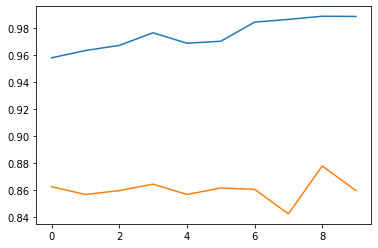

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

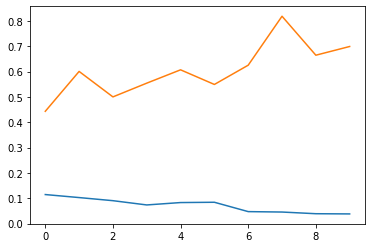

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [17]:
test_loss , test_acc = model.evaluate(test_data, test_label)
print("Test Accuracy", test_acc)

400/400 [==============================] - 1s 1ms/step
Test Accuracy 0.9


In [18]:
val_loss , val_acc = model.evaluate(valid_data, valid_label)
print("Valid Accuracy", val_acc)

1040/1040 [==============================] - 1s 1ms/step
Valid Accuracy 0.8596153846153847


In [19]:
pred = model.predict(test_data, steps = 1)

In [20]:
r_pred = []
for i in range(len(pred)):
    if pred[i] >= 0.5:
        r_pred.append(1)
    else:
        r_pred.append(0)

In [21]:
data = {'Prediction' : r_pred, 'Actual' : test_label}

In [22]:
df = pd.DataFrame(data)
df

,Prediction,Actual
0,1,0
1,0,0
2,1,0
3,1,0
4,1,0
...,...,...
395,1,1
396,1,1
397,1,1
398,1,1


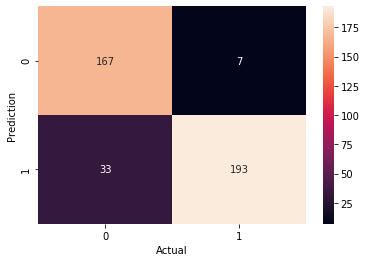

In [23]:
cm = pd.crosstab(df.Prediction, df.Actual)
seaborn.heatmap(cm, annot = True, fmt = '.0f')

In [24]:
def SinglePred(file):
    im = PIL.Image.open(file).convert('L')
    im = im.resize((dim, dim))
    array = np.asarray(im)
    array = np.reshape(array, (-1, dim, dim, 1))
    plt.imshow(im)
    x = model.predict(array)
    if (x >= 0.5).any():
        print('no_fire')
    else:
        print('fire')

fire


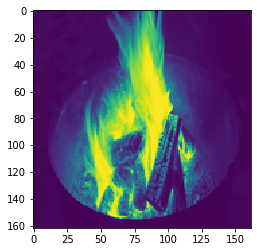

In [25]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\FNF\test\fire\istockphoto-504240925-612x612.jpg")

fire


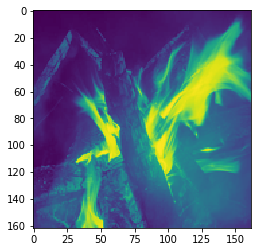

In [26]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\FNF\test\fire\istockphoto-525544175-612x612.jpg")

no_fire


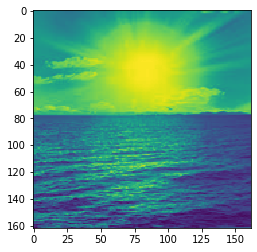

In [27]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\FNF\train\no_fire\download (24).jpeg")

fire


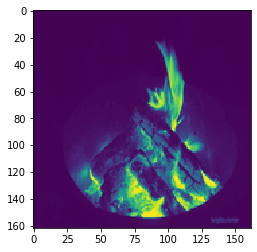

In [28]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\FNF\test\fire\istockphoto-525583171-612x612.jpg")

no_fire


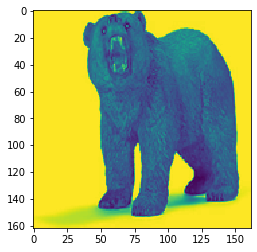

In [29]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\FNF\test\no_fire\1971d6e226.jpg")

no_fire


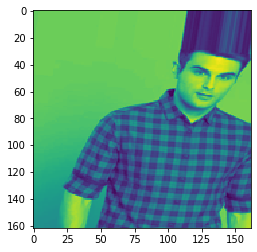

In [30]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\FNF\test\no_fire\-473Wx593H-462152991-yellow-MODEL.jpg_0_1577.jpg")

no_fire


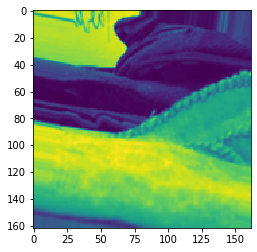

In [31]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\FNF\test\no_fire\z (3).jpg_0_918.jpg")

In [32]:
def generate_cm(path):
    aug_data = []
    aug_label = []
    for i in os.listdir(path):
        for j in os.listdir(path + '/' + i):
            filename = path + '/' + i + '/' + j
            im = PIL.Image.open(filename)
            im = im.resize((dim, dim))
            im = np.asarray(im)
            im = np.reshape(im, (dim, dim, 1))
            aug_data.append(im)
            if i == 'fire':
                aug_label.append(0)
            elif i == 'no_fire':
                aug_label.append(1)
            else:
                pass
    aug_data = np.array(aug_data)
    pred = model.predict(aug_data, steps = 1)
    r_pred = []
    for i in range(len(pred)):
        if pred[i] >= 0.5:
            r_pred.append(1)
        else:
            r_pred.append(0)
    data = {'Prediction' : r_pred, 'Actual' : aug_label}
    df = pd.DataFrame(data)
    cm = pd.crosstab(df.Prediction, df.Actual)
    confusion_matrix = seaborn.heatmap(cm, annot = True, fmt = '.0f')
    plt.show(confusion_matrix)

In [33]:
# generate_cm(r"C:\Users\Ravindra Singh\Desktop\FNF\test")

In [34]:
# generate_cm("E:/DL_work/Projects/Fire_&_Smoke/Fire_No_Fire/aug_data/set 2")

In [35]:
# generate_cm("E:/DL_work/Projects/Fire_&_Smoke/Fire_No_Fire/aug_data/set 3")

In [36]:
# generate_cm("E:/DL_work/Projects/Fire_&_Smoke/Fire_No_Fire/aug_data/set 4")

In [38]:
# model.save('FNF4_162x162_45k_data.h5')